In [75]:
from pickle import load
import numpy as np

In [76]:
path = '../bayes_implicit_solvent/rjmc_experiments/elaborate_tree_rjmc_march31_run_n_compounds=315_n_iter=100000_gaussian_ll_small_proposals_formatted.pkl'



In [77]:
with open(path, 'rb') as f:
    gaussian_trees = load(f)[1:]

In [78]:
t = gaussian_trees[0]

In [79]:
len(gaussian_trees)

500

In [80]:
discrete_trees = [tuple(t.ordered_nodes) for t in gaussian_trees]

In [81]:
len(set(discrete_trees))

23

In [82]:
events = [discrete_trees[i] != discrete_trees[i + 1] for i in range(len(discrete_trees) - 1)]

In [83]:
sum(events)

25

In [84]:
gaussian_trees[-1]

*                   (r = 1.00 Å, s = 0.85)
|-[r0]              (r = 1.70 Å, s = 0.81)
  |-[r0&#8]         (r = 1.81 Å, s = 1.04)
    |-[r0&#8&H1]    (r = 1.41 Å, s = 0.89)
  |-[r0&H2]         (r = 1.56 Å, s = 0.83)
  |-[r0&-1]         (r = 1.18 Å, s = 0.82)
  |-[r0&#1]         (r = 1.11 Å, s = 0.85)
|-[#7]              (r = 1.02 Å, s = 0.91)
|-[#15]             (r = 1.98 Å, s = 0.92)
|-[#17]             (r = 1.05 Å, s = 0.98)
|-[H3]              (r = 1.45 Å, s = 0.97)
|-[#16]             (r = 1.92 Å, s = 0.96)
  |-[#16&H2]        (r = 2.05 Å, s = 0.96)
  |-[#16&X1]        (r = 2.24 Å, s = 0.93)
  |-[#16&r7]        (r = 2.06 Å, s = 0.96)
|-[#35]             (r = 1.55 Å, s = 0.99)
|-[H2]              (r = 1.43 Å, s = 0.99)

In [126]:
path = '../bayes_implicit_solvent/rjmc_experiments/elaborate_tree_rjmc_march31_run_n_compounds=315_n_iter=100000_student-t_ll_small_proposals.pkl'



In [127]:
with open(path, 'rb') as f:
    student_t_trees = load(f)[1:]

In [128]:
len(student_t_trees)

4000

In [129]:
discrete_trees_t = [tuple(t.ordered_nodes) for t in student_t_trees]
len(set(discrete_trees_t))

43

In [130]:
events = [discrete_trees_t[i] != discrete_trees_t[i + 1] for i in range(len(discrete_trees_t) - 1)]
sum(events)

73

In [131]:
student_t_trees[-1]

*                  (r = 0.45 Å, s = 0.76)
|-[*]              (r = 1.51 Å, s = 0.89)
  |-[*&H2]         (r = 1.82 Å, s = 1.21)
    |-[*&H2&X4]    (r = 1.57 Å, s = 0.54)
  |-[*&#9]         (r = 2.43 Å, s = 0.68)
  |-[*&H1]         (r = 0.98 Å, s = 1.15)
  |-[*&#17]        (r = 1.24 Å, s = 1.10)
  |-[*&H3]         (r = 1.60 Å, s = 0.66)
  |-[*&#15]        (r = 3.54 Å, s = 0.73)
  |-[*&-1]         (r = 1.09 Å, s = 1.14)
  |-[*&#16]        (r = 1.69 Å, s = 1.00)
  |-[*&#53]        (r = 2.02 Å, s = 0.96)

In [132]:
student_t_trees[-1], gaussian_trees[-1]

(*                  (r = 0.45 Å, s = 0.76)
 |-[*]              (r = 1.51 Å, s = 0.89)
   |-[*&H2]         (r = 1.82 Å, s = 1.21)
     |-[*&H2&X4]    (r = 1.57 Å, s = 0.54)
   |-[*&#9]         (r = 2.43 Å, s = 0.68)
   |-[*&H1]         (r = 0.98 Å, s = 1.15)
   |-[*&#17]        (r = 1.24 Å, s = 1.10)
   |-[*&H3]         (r = 1.60 Å, s = 0.66)
   |-[*&#15]        (r = 3.54 Å, s = 0.73)
   |-[*&-1]         (r = 1.09 Å, s = 1.14)
   |-[*&#16]        (r = 1.69 Å, s = 1.00)
   |-[*&#53]        (r = 2.02 Å, s = 0.96),
 *                   (r = 1.00 Å, s = 0.85)
 |-[r0]              (r = 1.70 Å, s = 0.81)
   |-[r0&#8]         (r = 1.81 Å, s = 1.04)
     |-[r0&#8&H1]    (r = 1.41 Å, s = 0.89)
   |-[r0&H2]         (r = 1.56 Å, s = 0.83)
   |-[r0&-1]         (r = 1.18 Å, s = 0.82)
   |-[r0&#1]         (r = 1.11 Å, s = 0.85)
 |-[#7]              (r = 1.02 Å, s = 0.91)
 |-[#15]             (r = 1.98 Å, s = 0.92)
 |-[#17]             (r = 1.05 Å, s = 0.98)
 |-[H3]              (r = 1.45 Å, s = 0.97)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
def get_n_types_traj(trees):
    return np.array([t.number_of_nodes for t in trees])

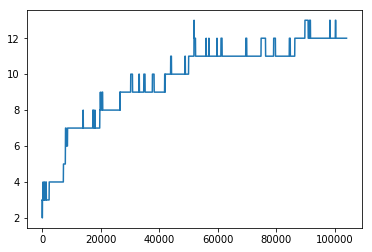

In [20]:
#x_iterations = np.arange(len(gaussian_trees)) * 26
#plt.plot(x_iterations, get_n_types_traj(gaussian_trees))
x_iterations = np.arange(len(student_t_trees)) * 26
plt.plot(x_iterations, get_n_types_traj(student_t_trees))

In [21]:
import networkx as nx

def get_tree_depth(tree):
    return max(nx.shortest_path_length(tree.G, source='*').values())

def get_depth_traj(trees):
    return np.array(list(map(get_tree_depth, trees)))

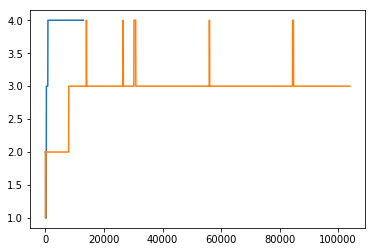

In [22]:
x_iterations = np.arange(len(gaussian_trees)) * 26
plt.plot(x_iterations, get_depth_traj(gaussian_trees))
x_iterations = np.arange(len(student_t_trees)) * 26
plt.plot(x_iterations, get_depth_traj(student_t_trees))

In [23]:
import numpy as np
from bayes_implicit_solvent.molecule import Molecule
from simtk import unit


def sample_path_to_unitted_snapshots(path_to_npy_samples):
    xyz = np.load(path_to_npy_samples)
    traj = [snapshot * unit.nanometer for snapshot in xyz]
    return traj


from glob import glob
from pkg_resources import resource_filename

path_to_vacuum_samples = resource_filename('bayes_implicit_solvent',
                                           'vacuum_samples/vacuum_samples_*.npy')
paths_to_samples = glob(path_to_vacuum_samples)
#np.random.seed(0)
#np.random.shuffle(paths_to_samples)
#paths_to_samples = paths_to_samples[::2]

print('number of molecules being considered: {}'.format(len(paths_to_samples)))


def extract_cid_key(path):
    i = path.find('mobley_')
    j = path.find('.npy')
    return path[i:j]


cids = list(map(extract_cid_key, paths_to_samples))
print('first few CIDs', cids[:5])

mols = []

n_configuration_samples = 50

from bayes_implicit_solvent.freesolv import cid_to_smiles

from bayes_implicit_solvent.constants import beta
def unreduce(value):
    """Input value is in units of kB T, turn it into units of kilocalorie_per_mole"""
    return value / (beta * unit.kilocalorie_per_mole)

for path in paths_to_samples:
    cid = extract_cid_key(path)
    smiles = cid_to_smiles[cid]
    vacuum_samples = sample_path_to_unitted_snapshots(path)
    thinning = int(len(vacuum_samples) / n_configuration_samples)
    mol = Molecule(smiles, vacuum_samples=vacuum_samples[::thinning])

    if (unreduce(mol.experimental_value) > -15) and (unreduce(mol.experimental_value) < 5):
        mols.append(mol)
    else:
        print('discarding {} ({}) because its free energy was outside of the range [-15, +5] kcal/mol'.format(smiles, cid))
        
from jax import jit, vmap
from bayes_implicit_solvent.gb_models.jax_gb_models import compute_OBC_energy_vectorized
from bayes_implicit_solvent.solvation_free_energy import kj_mol_to_kT, one_sided_exp

@jit
def predict_solvation_free_energy_jax(theta, distance_matrices, charges, element_ind_array):
    N = int(len(theta) / 2)
    radii_, scaling_factors_ = theta[:N], theta[N:]

    radii = radii_[element_ind_array]
    scaling_factors = scaling_factors_[element_ind_array]

    @jit
    def compute_component(distance_matrix):
        return compute_OBC_energy_vectorized(distance_matrix, radii, scaling_factors, charges)

    W_F = vmap(compute_component)(distance_matrices)

    w_F = W_F * kj_mol_to_kT
    return one_sided_exp(w_F)

distance_matrices = [mol.distance_matrices for mol in mols]
charges = [mol.charges for mol in mols]


expt_means = unreduce(np.array([mol.experimental_value for mol in mols]))
expt_uncs = unreduce(np.array([mol.experimental_uncertainty for mol in mols]))

number of molecules being considered: 642
first few CIDs ['mobley_3210206', 'mobley_3589456', 'mobley_1107178', 'mobley_5200358', 'mobley_1781152']


/Users/joshuafass/anaconda3/lib/python3.7/site-packages/jax/lib/xla_bridge.py:167: UserWarning: No GPU found, falling back to CPU.
  warnings.warn('No GPU found, falling back to CPU.')


discarding c1c(c(=O)[nH]c(=O)[nH]1)C(F)(F)F (mobley_7794077) because its free energy was outside of the range [-15, +5] kcal/mol
discarding c1c(c(=O)[nH]c(=O)[nH]1)F (mobley_337666) because its free energy was outside of the range [-15, +5] kcal/mol
discarding c1c(=O)[nH]c(=O)[nH]c1Cl (mobley_4338603) because its free energy was outside of the range [-15, +5] kcal/mol
discarding C([C@H]([C@H]([C@@H]([C@@H](CO)O)O)O)O)O (mobley_4587267) because its free energy was outside of the range [-15, +5] kcal/mol
discarding c1ccc(cc1)n2c(=O)c(c(cn2)N)Cl (mobley_2523689) because its free energy was outside of the range [-15, +5] kcal/mol
discarding c1c(c(=O)[nH]c(=O)[nH]1)Cl (mobley_9557440) because its free energy was outside of the range [-15, +5] kcal/mol
discarding c1c(c(=O)[nH]c(=O)[nH]1)I (mobley_2727678) because its free energy was outside of the range [-15, +5] kcal/mol
discarding C([C@@H]1[C@H]([C@@H]([C@H]([C@@H](O1)O)O)O)O)O (mobley_9534740) because its free energy was outside of the ra

In [24]:
oemols = [mol.mol for mol in mols]

In [25]:
# just apply the unique trees!

In [26]:
from tqdm import tqdm

In [27]:

gaussian_typings = {}
for t in tqdm(gaussian_trees):
    tu = tuple(t.ordered_nodes)
    if tu not in gaussian_typings:
        gaussian_typings[tu] = t.apply_to_molecule_list(oemols)

100%|██████████| 500/500 [00:22<00:00, 22.64it/s]


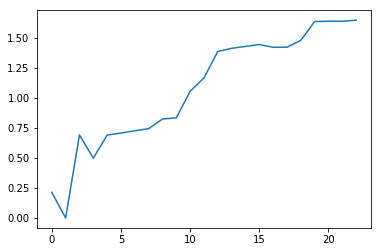

In [28]:
from scipy.stats import entropy
plt.plot([entropy(np.bincount(np.hstack(ty))[1:]) for ty in gaussian_typings.values()])

In [133]:
t_typings = {}
for t in tqdm(student_t_trees):
    tu = tuple(t.ordered_nodes)
    if tu not in t_typings:
        t_typings[tu] = t.apply_to_molecule_list(oemols)

100%|██████████| 4000/4000 [00:36<00:00, 110.69it/s]


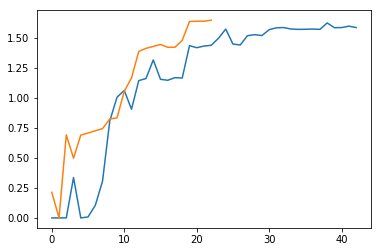

In [104]:
plt.plot([entropy(np.bincount(np.hstack(ty))[1:]) for ty in t_typings.values()])
plt.plot([entropy(np.bincount(np.hstack(ty))[1:]) for ty in gaussian_typings.values()])

In [31]:
len(set(discrete_trees).intersection(set(discrete_trees_t)))

2

In [32]:
t.assign_radii(oemols[0])

Quantity(value=array([0.16000539, 0.09814204, 0.15076736, 0.15685591, 0.15076736,
       0.15076736, 0.10914619, 0.10914619, 0.15076736, 0.15076736,
       0.10914619, 0.10914619, 0.15076736, 0.15076736, 0.15076736,
       0.15076736, 0.15076736]), unit=nanometer)

In [134]:
def get_theta(tree):
    return np.hstack([tree.get_radii(), tree.get_scale_factors()])

In [135]:
def get_predictions(theta, typings):
    return np.array([predict_solvation_free_energy_jax(theta, distance_matrices[i], charges[i], typings[i]) for i in range(len(charges))])



# Get a prediction trajectory, and make a movie!

In [136]:
gaussian_trajs_concat = np.load('../bayes_implicit_solvent/rjmc_experiments/elaborate_tree_rjmc_march31_run_n_compounds=315_n_iter=100000_gaussian_ll_small_proposals.npz')['within_model_trajs']
student_t_trajs_concat = np.load('../bayes_implicit_solvent/rjmc_experiments/elaborate_tree_rjmc_march31_run_n_compounds=315_n_iter=100000_student-t_ll_small_proposals.npz')['within_model_trajs']


In [34]:
len(set([tuple(t) for t in gaussian_trajs_concat]))

6831

In [35]:
len(gaussian_trajs_concat) /4000

3.25

In [137]:
gaussian_trajs = [gaussian_trajs_concat[26*i:26*(i+1)] for i in range(len(gaussian_trees))]
student_t_trajs = [student_t_trajs_concat[26*i:26*(i+1)] for i in range(len(student_t_trees))]

In [138]:
gaussian_thetas = [traj[-1] for traj in gaussian_trajs]
student_t_thetas = [traj[-1] for traj in student_t_trajs]

In [38]:
set([len(t) for t in gaussian_trajs]), set([len(t) for t in student_t_trajs])

({26}, {26})

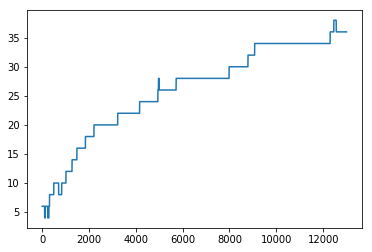

In [39]:
plt.plot([len(t) for t in gaussian_trajs_concat])

In [40]:
N_s_continuous = np.array([int(len(t)/2) for t in gaussian_trajs_concat])
len(N_s_continuous)

13000

In [41]:
26 * (len(gaussian_trees))

13000

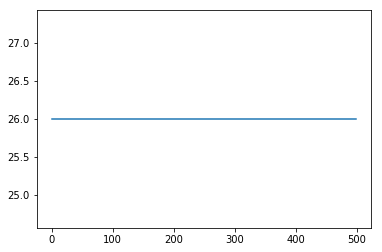

In [42]:
plt.plot([len(t) for t in gaussian_trajs])

In [43]:
len(N_s_continuous)

13000

In [44]:
len(N_s_continuous)

13000

In [45]:
okay_inds = []
problem_inds = []
for i in tqdm(range(len(gaussian_trees))):
    n_continuous = N_s_continuous[i * 26]
    n_discrete = len(gaussian_trees[i].ordered_nodes)
    if n_continuous == n_discrete:
        okay_inds.append(i)
    else:
        problem_inds.append(i)

100%|██████████| 500/500 [00:00<00:00, 228025.66it/s]


In [46]:
len(problem_inds)

0

In [139]:
preds = get_predictions(
    student_t_thetas[-1],
    t_typings[tuple(student_t_trees[-1].ordered_nodes)])

In [140]:
def rmse(x, y):
    return np.sqrt(np.mean((x - y)**2))

In [141]:
rmse(unreduce(preds), expt_means)

1.9987678160938642

In [53]:
gaussian_trajs[0][0]

array([0.1       , 0.1       , 0.10070859, 0.85      , 0.85      ,
       0.85073041])

In [54]:
gaussian_trees[0]

*             (r = 1.00 Å, s = 0.85)
|-[*]         (r = 1.02 Å, s = 0.85)
  |-[*&#8]    (r = 1.02 Å, s = 0.85)

In [55]:
gaussian_prediction_traj = []
for i in tqdm(range(len(gaussian_trees))[::5]):
    gaussian_prediction_traj.append(get_predictions(
        gaussian_thetas[i],
        gaussian_typings[tuple(gaussian_trees[i].ordered_nodes)]))

100%|██████████| 100/100 [05:15<00:00,  3.31s/it]


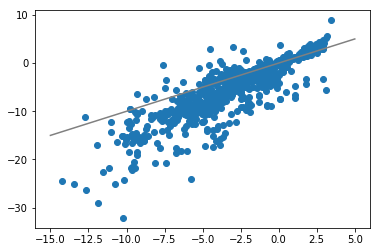

In [56]:
diag = np.linspace(-15,5)
plt.scatter(expt_means, gaussian_prediction_traj[-1])
plt.plot(diag, diag, c='grey')

In [57]:
unreduced_gaussian_prediction_traj = unreduce(np.array(gaussian_prediction_traj))

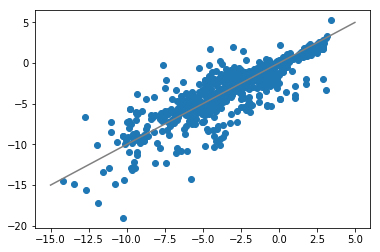

In [58]:
diag = np.linspace(-15,5)
plt.scatter(expt_means, unreduced_gaussian_prediction_traj[-1])
plt.plot(diag, diag, c='grey')

In [ ]:
len(set([tuple(p) for p in unreduced_gaussian_prediction_traj]))

In [ ]:
len(set([tuple(t.get_radii()) for t in gaussian_trees]))

In [ ]:
np.save('march30_gaussian_ll_rjmc_prediction_traj.npy', unreduced_gaussian_prediction_traj)

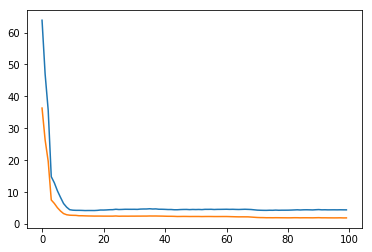

In [59]:
plt.plot([rmse(p, expt_means) for p in gaussian_prediction_traj])
plt.plot([rmse(p, expt_means) for p in unreduced_gaussian_prediction_traj])

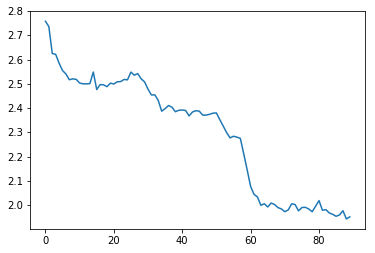

In [60]:
plt.plot([rmse(p, expt_means) for p in unreduced_gaussian_prediction_traj[10:]])

In [ ]:
rmse(unreduced_gaussian_prediction_traj[-1], expt_means)

In [ ]:
rmse(gaussian_prediction_traj[-1], expt_means)

In [61]:
train_inds = np.array([  1,   2,   3,   5,   6,   8,  10,  13,  16,  17,  18,  20,  21,
        22,  23,  24,  28,  32,  33,  36,  37,  39,  41,  43,  44,  46,
        48,  49,  51,  52,  54,  56,  57,  62,  64,  66,  68,  70,  73,
        79,  82,  83,  84,  85,  92,  94,  97, 100, 101, 104, 105, 107,
       109, 110, 111, 115, 117, 118, 119, 120, 121, 122, 123, 126, 129,
       131, 132, 138, 139, 142, 143, 144, 145, 146, 151, 152, 154, 156,
       157, 159, 162, 163, 164, 166, 172, 173, 175, 176, 177, 183, 184,
       187, 188, 190, 195, 196, 199, 200, 201, 204, 205, 208, 214, 215,
       216, 223, 226, 227, 229, 230, 232, 233, 238, 239, 240, 243, 244,
       245, 246, 254, 255, 262, 263, 264, 266, 267, 270, 271, 273, 274,
       275, 277, 278, 279, 289, 290, 291, 292, 295, 296, 298, 299, 301,
       302, 303, 304, 305, 306, 307, 308, 311, 312, 319, 320, 321, 322,
       324, 326, 328, 329, 333, 336, 337, 340, 341, 342, 345, 346, 347,
       351, 353, 354, 357, 359, 360, 363, 366, 367, 369, 371, 374, 376,
       379, 380, 382, 386, 391, 392, 393, 394, 395, 396, 397, 399, 400,
       401, 402, 404, 408, 411, 412, 413, 414, 415, 417, 419, 420, 421,
       428, 429, 430, 431, 432, 433, 434, 435, 436, 440, 441, 442, 443,
       445, 447, 448, 452, 453, 455, 457, 458, 459, 461, 462, 463, 464,
       466, 468, 469, 470, 471, 472, 474, 482, 483, 484, 485, 486, 487,
       490, 491, 494, 495, 496, 499, 500, 502, 503, 509, 511, 516, 517,
       519, 523, 524, 527, 528, 529, 530, 531, 533, 534, 538, 539, 541,
       542, 543, 545, 546, 547, 548, 553, 561, 562, 565, 566, 568, 570,
       573, 574, 577, 579, 580, 581, 583, 584, 585, 589, 590, 593, 594,
       595, 596, 597, 603, 605, 606, 609, 615, 616, 617, 618, 619, 623,
       624, 625, 628])

In [62]:
test_inds = np.array([  0,   4,   7,   9,  11,  12,  14,  15,  19,  25,  26,  27,  29,
        30,  31,  34,  35,  38,  40,  42,  45,  47,  50,  53,  55,  58,
        59,  60,  61,  63,  65,  67,  69,  71,  72,  74,  75,  76,  77,
        78,  80,  81,  86,  87,  88,  89,  90,  91,  93,  95,  96,  98,
        99, 102, 103, 106, 108, 112, 113, 114, 116, 124, 125, 127, 128,
       130, 133, 134, 135, 136, 137, 140, 141, 147, 148, 149, 150, 153,
       155, 158, 160, 161, 165, 167, 168, 169, 170, 171, 174, 178, 179,
       180, 181, 182, 185, 186, 189, 191, 192, 193, 194, 197, 198, 202,
       203, 206, 207, 209, 210, 211, 212, 213, 217, 218, 219, 220, 221,
       222, 224, 225, 228, 231, 234, 235, 236, 237, 241, 242, 247, 248,
       249, 250, 251, 252, 253, 256, 257, 258, 259, 260, 261, 265, 268,
       269, 272, 276, 280, 281, 282, 283, 284, 285, 286, 287, 288, 293,
       294, 297, 300, 309, 310, 313, 314, 315, 316, 317, 318, 323, 325,
       327, 330, 331, 332, 334, 335, 338, 339, 343, 344, 348, 349, 350,
       352, 355, 356, 358, 361, 362, 364, 365, 368, 370, 372, 373, 375,
       377, 378, 381, 383, 384, 385, 387, 388, 389, 390, 398, 403, 405,
       406, 407, 409, 410, 416, 418, 422, 423, 424, 425, 426, 427, 437,
       438, 439, 444, 446, 449, 450, 451, 454, 456, 460, 465, 467, 473,
       475, 476, 477, 478, 479, 480, 481, 488, 489, 492, 493, 497, 498,
       501, 504, 505, 506, 507, 508, 510, 512, 513, 514, 515, 518, 520,
       521, 522, 525, 526, 532, 535, 536, 537, 540, 544, 549, 550, 551,
       552, 554, 555, 556, 557, 558, 559, 560, 563, 564, 567, 569, 571,
       572, 575, 576, 578, 582, 586, 587, 588, 591, 592, 598, 599, 600,
       601, 602, 604, 607, 608, 610, 611, 612, 613, 614, 620, 621, 622,
       626, 627, 629, 630])

In [63]:
def train_rmse(preds):
    return rmse(preds[train_inds], expt_means[train_inds])
def test_rmse(preds):
    return rmse(preds[test_inds], expt_means[test_inds])

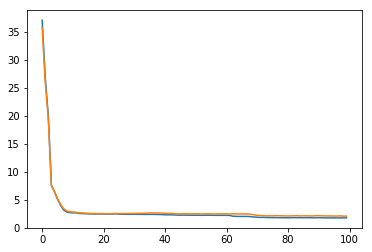

In [64]:
gaussian_train_rmse_traj = np.array(list(map(train_rmse, unreduced_gaussian_prediction_traj)))
gaussian_test_rmse_traj = np.array(list(map(test_rmse, unreduced_gaussian_prediction_traj)))

plt.plot(gaussian_train_rmse_traj)
plt.plot(gaussian_test_rmse_traj)

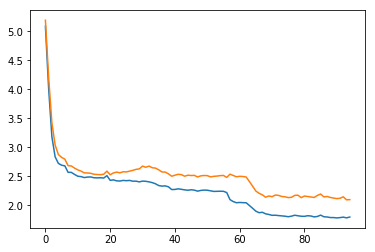

In [66]:
plt.plot(gaussian_train_rmse_traj[5:])
plt.plot(gaussian_test_rmse_traj[5:])

In [67]:
gaussian_trees[-1].get_radii()

array([0.10899437, 0.14807948, 0.16990919, 0.10162536, 0.19826005,
       0.10497405, 0.14500035, 0.19239225, 0.15525736, 0.14302566,
       0.18124783, 0.1558685 , 0.11775291, 0.11097758, 0.20503532,
       0.22430716, 0.20640468, 0.14146332])

In [68]:
len(set(gaussian_test_rmse_traj))

100

# Make a movie of the atom-typing scheme!

In [69]:
list(zip(discrete_trees[0], np.bincount(np.hstack(list(gaussian_typings.values())[0]))))

[('*', 0), ('[*]', 10803), ('[*&#8]', 630)]

In [70]:
student_t_trees[-1]

*                  (r = 0.45 Å, s = 0.76)
|-[*]              (r = 1.51 Å, s = 0.89)
  |-[*&H2]         (r = 1.82 Å, s = 1.21)
    |-[*&H2&X4]    (r = 1.57 Å, s = 0.54)
  |-[*&#9]         (r = 2.43 Å, s = 0.68)
  |-[*&H1]         (r = 0.98 Å, s = 1.15)
  |-[*&#17]        (r = 1.24 Å, s = 1.10)
  |-[*&H3]         (r = 1.60 Å, s = 0.66)
  |-[*&#15]        (r = 3.54 Å, s = 0.73)
  |-[*&-1]         (r = 1.09 Å, s = 1.14)
  |-[*&#16]        (r = 1.69 Å, s = 1.00)
  |-[*&#53]        (r = 2.02 Å, s = 0.96)

In [97]:
def expt_unc_contained(preds, i, desired_coverage=0.95):
    alpha = 100 * ((1 - desired_coverage) / 2)
    upper, lower = norm.cdf(np.percentile(preds, q=[100 - alpha, alpha]), loc=expt_means[i], scale=expt_uncs[i])
    return upper - lower

In [98]:
from scipy.stats import norm
from bayes_implicit_solvent.utils import remove_top_right_spines
desired_coverages = np.linspace(0,1)

In [99]:


actual_coverages = np.vstack([np.array([expt_unc_contained(unreduced_gaussian_prediction_traj[:,i], i, desired_coverage=p) for i in range(len(mols))]) for p in desired_coverages])



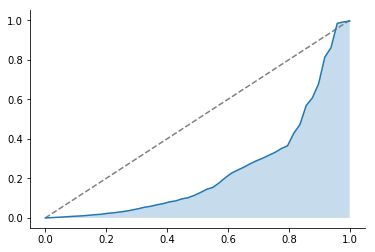

In [124]:

ax = plt.subplot(1,1,1)
remove_top_right_spines(ax)
plt.plot(desired_coverages, desired_coverages, c='grey', linestyle='--')

plt.plot(desired_coverages, np.median(actual_coverages, 1), label='gaussian')
plt.fill_between(desired_coverages, np.median(actual_coverages, 1), alpha=0.25)

In [101]:
np.trapz(np.mean(actual_coverages, 1), desired_coverages)

0.2842287450680915

In [147]:
student_t_prediction_traj = []
for i in tqdm(range(len(student_t_trees))[::10]):
    student_t_prediction_traj.append(get_predictions(
        student_t_thetas[i],
        t_typings[tuple(student_t_trees[i].ordered_nodes)]))

100%|██████████| 400/400 [02:23<00:00,  2.80it/s]


In [148]:
student_t_prediction_traj = np.array(student_t_prediction_traj)

In [149]:
unreduced_student_t_prediction_traj = unreduce(np.array(student_t_prediction_traj))

In [150]:
t_actual_coverages = np.vstack([np.array([expt_unc_contained(unreduced_student_t_prediction_traj[:,i], i, desired_coverage=p) for i in range(len(mols))]) for p in desired_coverages])

(0, 1)

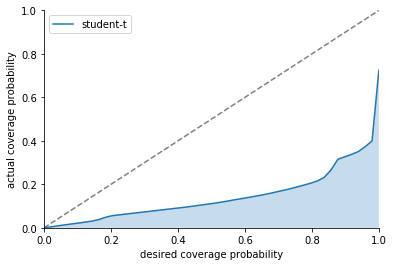

In [154]:
ax = plt.subplot(1,1,1)
remove_top_right_spines(ax)
plt.plot(desired_coverages, desired_coverages, c='grey', linestyle='--')

#for a in actual_coverages.T[10:]:
#    plt.plot(desired_coverages, a, c='lightblue', alpha=0.5)
#plt.plot(desired_coverages, np.mean(actual_coverages[:,10:], 1), label='gaussian')
#plt.fill_between(desired_coverages, np.mean(actual_coverages[:,10:], 1), alpha=0.25)

plt.plot(desired_coverages, np.mean(t_actual_coverages, 1), label='student-t')
plt.fill_between(desired_coverages, np.mean(t_actual_coverages, 1), alpha=0.25)

plt.legend()
plt.xlabel('desired coverage probability')
plt.ylabel('actual coverage probability')
plt.xlim(0,1)
plt.ylim(0,1)

(0, 1)

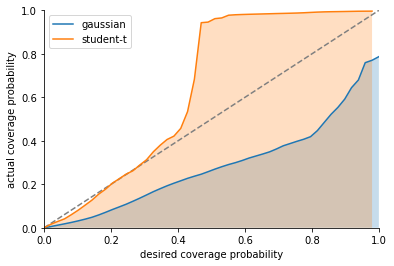

In [111]:
ax = plt.subplot(1,1,1)
remove_top_right_spines(ax)
plt.plot(desired_coverages, desired_coverages, c='grey', linestyle='--')

plt.plot(desired_coverages, np.mean(actual_coverages, 1), label='gaussian')
plt.fill_between(desired_coverages, np.mean(actual_coverages, 1), alpha=0.25)

plt.plot(desired_coverages, np.mean(t_actual_coverages, 1), label='student-t')
plt.fill_between(desired_coverages, np.mean(t_actual_coverages, 1), alpha=0.25)

plt.legend()
plt.xlabel('desired coverage probability')
plt.ylabel('actual coverage probability')
plt.xlim(0,1)
plt.ylim(0,1)

In [112]:
np.trapz(np.mean(t_actual_coverages, 1), desired_coverages)

nan

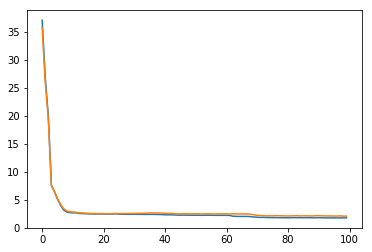

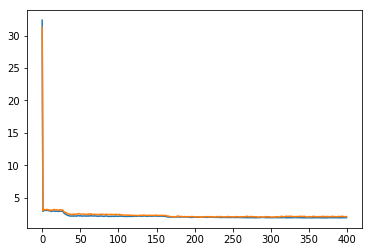

In [155]:
gaussian_train_rmse_traj = np.array(list(map(train_rmse, unreduced_gaussian_prediction_traj)))
gaussian_test_rmse_traj = np.array(list(map(test_rmse, unreduced_gaussian_prediction_traj)))

t_train_rmse_traj = np.array(list(map(train_rmse, unreduced_student_t_prediction_traj)))
t_test_rmse_traj = np.array(list(map(test_rmse, unreduced_student_t_prediction_traj)))


plt.plot(gaussian_train_rmse_traj)
plt.plot(gaussian_test_rmse_traj)
plt.figure()
plt.plot(t_train_rmse_traj)
plt.plot(t_test_rmse_traj)

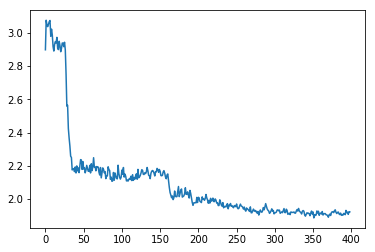

In [157]:
plt.plot(t_train_rmse_traj[1:])
#plt.plot(t_test_rmse_traj[1:])

In [158]:
t_test_rmse_traj

array([31.24728361,  3.02976019,  3.22971199,  3.18767314,  3.15664611,
        3.17769525,  3.19014679,  3.18754501,  3.09686904,  3.13957914,
        3.11191206,  3.04377827,  3.06020113,  3.13374768,  3.11739739,
        3.13894471,  3.19319219,  3.13041019,  3.126507  ,  3.15616214,
        3.10616269,  3.05691288,  3.09541472,  3.14605141,  3.11306841,
        3.1108387 ,  3.13163933,  3.10221318,  2.96788607,  2.79390205,
        2.7562477 ,  2.71460362,  2.64656166,  2.60512243,  2.45414994,
        2.4916949 ,  2.43788184,  2.47759178,  2.42750359,  2.42806711,
        2.47649005,  2.41005409,  2.47662036,  2.46625059,  2.48344635,
        2.41275434,  2.47520583,  2.53986717,  2.55686956,  2.49503533,
        2.48031411,  2.46249192,  2.48395993,  2.47554168,  2.48515941,
        2.48363676,  2.42826231,  2.40644541,  2.44382171,  2.4577123 ,
        2.37187342,  2.49608814,  2.49990206,  2.46013529,  2.53300493,
        2.43159006,  2.41670213,  2.40498565,  2.46106587,  2.44

In [ ]:
t_test_rmse_traj[-1]

In [ ]:
train_rmse(np.mean(unreduced_student_t_prediction_traj[10:], 0))

In [ ]:
train_rmse(np.mean(unreduced_gaussian_prediction_traj[10:], 0))

In [ ]:
test_rmse(np.mean(unreduced_student_t_prediction_traj[10:], 0))

In [ ]:
np.min(t_test_rmse_traj)

In [ ]:
test_rmse(np.mean(unreduced_gaussian_prediction_traj[10:], 0))

In [ ]:
# oh, wait, each one of the predictions has an uncertainty I've neglected!

In [ ]:
@jit
def compute_exp_uncertainty(w_F):
    x = np.exp(w_F - np.max(w_F))
    Ex = np.mean(x)
    dx = np.std(x) / np.sqrt(len(x))
    return dx / Ex

In [ ]:
@jit
def predict_solvation_free_energy_jax_w_unc(theta, distance_matrices, charges, element_ind_array):
    N = int(len(theta) / 2)
    radii_, scaling_factors_ = theta[:N], theta[N:]

    radii = radii_[element_ind_array]
    scaling_factors = scaling_factors_[element_ind_array]

    @jit
    def compute_component(distance_matrix):
        return compute_OBC_energy_vectorized(distance_matrix, radii, scaling_factors, charges)

    W_F = vmap(compute_component)(distance_matrices)

    w_F = W_F * kj_mol_to_kT
    unc = compute_exp_uncertainty(w_F)
    return one_sided_exp(w_F), unc

In [ ]:
import jax.numpy as np
def get_predictions_and_uncs(theta, typings):
    
    ## TypeError: 'FilledConstant' object does not support item assignment
    #preds = np.zeros(len(typings))
    #uncs = np.zeros(len(typings))
    #for i in range(len(charges)):
    #    preds[i], uncs[i] = predict_solvation_free_energy_jax_w_unc(theta, distance_matrices[i], charges[i], typings[i])
    
    # OKAY, fine a list comprehension...
    preds_and_uncs = [predict_solvation_free_energy_jax_w_unc(theta, distance_matrices[i], charges[i], typings[i]) for i in range(len(typings))]
    preds = np.array([p for (p,u) in preds_and_uncs])
    uncs = np.array([u for (p,u) in preds_and_uncs])
    return preds, uncs

In [ ]:
student_t_prediction_traj = []
student_t_unc_traj = []
for i in tqdm(range(len(student_t_trees))[::5]):
    preds, uncs = get_predictions_and_uncs(
        student_t_thetas[i],
        t_typings[tuple(student_t_trees[i].ordered_nodes)])
    student_t_prediction_traj.append(preds)
    student_t_unc_traj.append(uncs)

In [ ]:
student_t_prediction_traj = np.array(student_t_prediction_traj)
student_t_unc_traj = np.array(student_t_unc_traj)

In [ ]:
student_t_unc_traj.flatten().max()

In [ ]:
plt.hist(student_t_unc_traj.flatten(), bins=50);

In [ ]:
preds, uncs = student_t_prediction_traj[:,0], student_t_unc_traj[:,0]

In [ ]:
x_ = np.linspace(-15,5,1000)

In [ ]:
plt.hist(preds, density=True);

In [ ]:
def uncertainty_density(x, preds, uncs):
    return sum([norm.pdf(x, loc=mu, scale=sigma) for (mu, sigma) in zip(preds, uncs)]) / len(preds)

In [ ]:
y_ = uncertainty_density(x_, preds, uncs)

In [ ]:
plt.plot(x_, y_)
plt.xlim(-12,-4)
plt.hist(preds, density=True);
plt.plot(x_, norm.pdf(x_, expt_means[0], expt_uncs[0]))

In [ ]:
from numpy import trapz
trapz(y_, x_)

In [ ]:
plt.plot(x_, norm.pdf(x_, preds[0], uncs[0]))
plt.plot(x_, norm.pdf(x_, expt_means[0], expt_uncs[0]))

In [ ]:
i = train_inds[10]
preds, uncs = student_t_prediction_traj[:,i], student_t_unc_traj[:,i]

plt.plot(x_, norm.pdf(x_, expt_means[i], expt_uncs[i]))
plt.plot(x_, norm.pdf(x_, preds[0], uncs[0]))
plt.xlim(-8,-1)

In [ ]:
plt.plot(x_, norm.pdf(x_, expt_means[i], expt_uncs[i]))
y_ = uncertainty_density(x_, preds, uncs)
plt.plot(x_, y_)
plt.xlim(-8,-1)

In [ ]:
diag = np.linspace(-15,5)
plt.scatter(expt_means, unreduced_student_t_prediction_traj[-1])
plt.plot(diag, diag, c='grey')

In [ ]:
diag = np.linspace(-15,5)
plt.scatter(expt_means[train_inds], unreduced_student_t_prediction_traj[-1][train_inds])
plt.plot(diag, diag, c='grey')

In [ ]:
diag = np.linspace(-15,5)
plt.scatter(expt_means[test_inds], unreduced_student_t_prediction_traj[-1][test_inds])
plt.plot(diag, diag, c='grey')

In [ ]:
averaged_prediction = np.mean(unreduced_student_t_prediction_traj, 0)
median_prediction = np.median(unreduced_student_t_prediction_traj, 0)

In [ ]:
diag = np.linspace(-15,5)
plt.scatter(averaged_prediction[test_inds], expt_means[test_inds])
plt.plot(diag, diag, c='grey')

In [ ]:
diag = np.linspace(-15,5)
plt.scatter(median_prediction[test_inds], expt_means[test_inds])
plt.plot(diag, diag, c='grey')

In [ ]:
averaged_prediction = np.mean(unreduced_student_t_prediction_traj, 0)
median_prediction = np.median(unreduced_student_t_prediction_traj, 0)

rmse(median_prediction[test_inds], expt_means[test_inds]), rmse(averaged_prediction[test_inds], expt_means[test_inds])

In [ ]:
averaged_prediction = np.mean(unreduced_gaussian_prediction_traj, 0)
median_prediction = np.median(unreduced_gaussian_prediction_traj, 0)

rmse(median_prediction[test_inds], expt_means[test_inds]), rmse(averaged_prediction[test_inds], expt_means[test_inds])

In [164]:
burn_in = 10
running_median_prediction = np.array([np.median(unreduced_student_t_prediction_traj[burn_in:t], 0) for t in range(burn_in, len(unreduced_student_t_prediction_traj))])



In [165]:
t_train_rmse_traj_med = np.array(list(map(train_rmse, running_median_prediction)))
t_test_rmse_traj_med = np.array(list(map(test_rmse, running_median_prediction)))

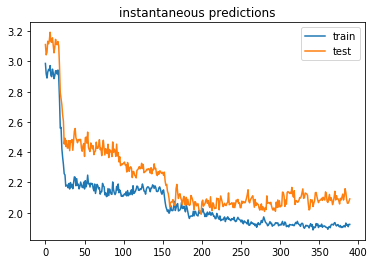

In [168]:
plt.title('instantaneous predictions')
plt.plot(t_train_rmse_traj[burn_in:], label='train')
plt.plot(t_test_rmse_traj[burn_in:], label='test')
plt.legend()

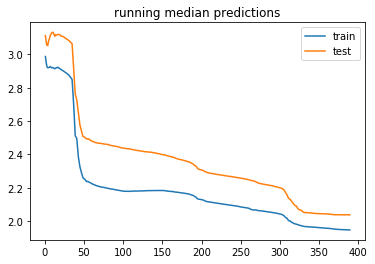

In [169]:
plt.title('running median predictions')
plt.plot(t_train_rmse_traj_med, label='train')
plt.plot(t_test_rmse_traj_med, label='test')
plt.legend()

In [170]:
Deltas = np.zeros((len(test_inds), len(test_inds)))

for i in range(len(test_inds)):
    for j in range(len(test_inds)):
        Deltas[i,j] = expt_means[test_inds[i]] - expt_means[test_inds[j]]

In [171]:
flat_Deltas = []

for i in range(len(test_inds)):
    for j in range(i+1, len(test_inds)):
        flat_Deltas.append(expt_means[test_inds[i]] - expt_means[test_inds[j]])
flat_Deltas = np.array(flat_Deltas)

In [172]:
preds = running_median_prediction[-1]

In [173]:
predicted_Deltas = np.zeros((len(test_inds), len(test_inds)))

for i in range(len(test_inds)):
    for j in range(len(test_inds)):
        predicted_Deltas[i,j] = preds[test_inds[i]] - preds[test_inds[j]]

In [174]:
flat_predicted_Deltas = []

for i in range(len(test_inds)):
    for j in range(i+1, len(test_inds)):
        flat_predicted_Deltas.append(preds[test_inds[i]] - preds[test_inds[j]])
flat_predicted_Deltas = np.array(flat_predicted_Deltas)

In [175]:
np.mean(np.sign(flat_Deltas) == np.sign(flat_predicted_Deltas))

0.8344986939923649

In [176]:
disagreements = np.sign(flat_Deltas) != np.sign(flat_predicted_Deltas)

In [177]:
np.mean(disagreements)

0.16550130600763513

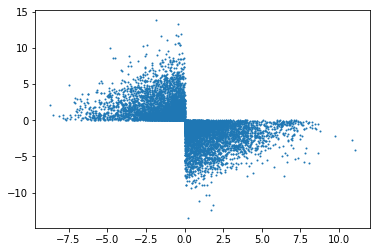

In [178]:
plt.scatter(flat_Deltas[disagreements], flat_predicted_Deltas[disagreements], s=1)

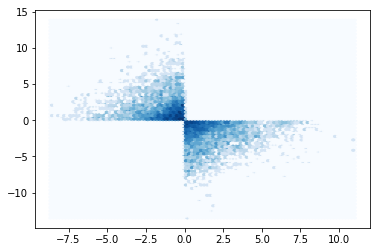

In [179]:
plt.hexbin(flat_Deltas[disagreements], flat_predicted_Deltas[disagreements], bins='log', cmap='Blues')

# Instead of comparing the means here, should be doing a statistical test or something!

# Need to compare with predictions from original OBC2 model!

# Should move these analyses into a submodule, maybe performance_metrics or similar...

In [ ]:
np.mean((Deltas - predicted_Deltas)**2)

In [ ]:
plt.scatter(Deltas.flatten(), predicted_Deltas.flatten(), s=1)

In [ ]:
plt.hexbin(flat_Deltas, predicted_Deltas, bins='log', cmap='Blues')

In [ ]:
np.argmax(Deltas - predicted_Deltas)

In [ ]:
mbondi2_preds, mbondi2_uncs = unreduce(np.load('mbondi2_preds.npy')).T

In [ ]:
rmse(mbondi2_preds, expt_means)

In [ ]:
from bayes_implicit_solvent.gb_models.obc2_parameters import mbondi2_model

In [ ]:
mbondi2_types = mbondi2_model.apply_to_molecule_list(oemols)

In [ ]:
mbondi2_radii = mbondi2_model.get_radii()
mbondi2_scales = mbondi2_model.get_scale_factors()
mbondi2_theta = np.hstack([mbondi2_radii, mbondi2_scales])

In [ ]:
reduced_mbondi2_preds, reduced_mbondi2_uncs = get_predictions_and_uncs(mbondi2_theta, mbondi2_types)

In [ ]:
mbondi2_preds = unreduce(reduced_mbondi2_preds)
mbondi2_uncs = unreduce(reduced_mbondi2_uncs)

In [ ]:
rmse(mbondi2_preds, expt_means)

In [ ]:
OBC2_Deltas = np.zeros((len(test_inds), len(test_inds)))

for i in range(len(test_inds)):
    for j in range(len(test_inds)):
        OBC2_Deltas[i,j] = mbondi2_preds[test_inds[i]] - mbondi2_preds[test_inds[j]]

In [ ]:
flat_OBC2_Deltas = []

for i in range(len(test_inds)):
    for j in range(i+1, len(test_inds)):
        flat_OBC2_Deltas.append(mbondi2_preds[test_inds[i]] - mbondi2_preds[test_inds[j]])
flat_OBC2_Deltas = np.array(flat_OBC2_Deltas)

In [ ]:
plt.hexbin(flat_Deltas, flat_OBC2_Deltas, bins='log', cmap='Blues')

In [ ]:
np.median((flat_Deltas - flat_OBC2_Deltas)**2)

In [ ]:
np.median((flat_Deltas - flat_predicted_Deltas)**2)

In [ ]:
disagreements = np.sign(flat_Deltas) != np.sign(flat_OBC2_Deltas)

In [ ]:
1 - np.mean(disagreements)

In [ ]:
plt.hexbin(flat_OBC2_Deltas[disagreements],flat_Deltas[disagreements],  bins='log', cmap='Blues')
plt.xlabel('OBC2 prediction')
plt.ylabel('experimental value')

In [ ]:
np.max(flat_OBC2_Deltas[disagreements]-flat_Deltas[disagreements])

In [ ]:
np.min(flat_OBC2_Deltas[disagreements]-flat_Deltas[disagreements])

In [ ]:
plt.hist(flat_OBC2_Deltas[disagreements], bins=50);
plt.hist(flat_Deltas[disagreements], bins=50);

In [ ]:
# for each one of these pairs, can I do a substructure analysis to see how similar they are?
# then I could pick some extreme examples on both ends, and some moderate examples:
# * a very similar-looking pair with a very big difference in hydration free energy
# * a very different-looking pair with a very small difference in hydration free energy
# * less extreme examples...

In [ ]:
from openeye import oechem



In [ ]:
mcss.SetMCSFunc(oechem.OEMCSMaxAtoms())

In [ ]:
def size_of_mcs(m1, m2):
    atomexpr = oechem.OEExprOpts_DefaultAtoms
    bondexpr = oechem.OEExprOpts_DefaultBonds
    mcss = oechem.OEMCSSearch(m1, atomexpr, bondexpr, oechem.OEMCSType_Approximate)
    mcss.SetMCSFunc(oechem.OEMCSMaxAtoms())

    match_sizes = [0]
    for count, match in enumerate(mcss.Match(m2, True)):
        m = oechem.OEGraphMol()
        oechem.OESubsetMol(m, match, True)
        match_sizes.append(m.NumAtoms())
    return max(match_sizes)

In [ ]:
test_mols = [oemols[i] for i in test_inds]
mcs_sizes = np.zeros((len(test_mols), len(test_mols)))
for i in tqdm(range(len(test_mols))):
    for j in range(len(test_mols)):
        mcs_sizes[i,j] = size_of_mcs(test_mols[i], test_mols[j])

In [ ]:
oechem.OEMCSType_Approximate

In [ ]:
sizes = np.array([m.NumAtoms() for m in test_mols])
pair_min_sizes = np.minimum(np.outer(sizes, np.ones(len(sizes))).T, np.outer(sizes, np.ones(len(sizes))))

pair_max_sizes = np.maximum(np.outer(sizes, np.ones(len(sizes))).T, np.outer(sizes, np.ones(len(sizes))))
plt.imshow(mcs_sizes / pair_max_sizes)
plt.colorbar()

In [ ]:
affinities = mcs_sizes / pair_max_sizes

In [ ]:
from sklearn.cluster.bicluster import SpectralBiclustering
bic = SpectralBiclustering(n_clusters=6)
bic.fit(affinities)
inds = np.argsort(bic.column_labels_)
plt.imshow(affinities[inds][:,inds])
plt.colorbar()

In [ ]:
plt.scatter(affinities.flatten(), np.abs(Deltas).flatten(), s=1)

In [ ]:
plt.hexbin(affinities.flatten(), np.abs(Deltas).flatten(),bins='log', cmap='Blues')

In [ ]:
plt.hexbin(affinities.flatten(), Deltas.flatten(),bins='log', cmap='Blues')
plt.xlabel('|MCS(m1,m2)| / max(|m1|, |m2|)')
plt.ylabel(r'$\Delta G_{hyd}(m_1) - \Delta G_{hyd}(m_2)$')

In [ ]:
# find pareto front of MCS size and absolute value of Delta

X = np.vstack([affinities.flatten(), np.abs(Deltas.flatten())]).T

pareto_front = [0]

for i in range(len(X)):
    pareto_optimal = True
    
    for j in pareto_front:
        if (X[j] > X[i]).all():
            pareto_optimal = False
            break
    
    if pareto_optimal:
        pareto_front.append(i)

In [ ]:
len(pareto_front)

In [ ]:
plt.scatter(*X[pareto_front].T)

In [ ]:
np.max(np.abs(Deltas.flatten())[affinities.flatten() > 0.9])

In [ ]:
x_affinities = sorted(list(set(affinities.flatten())))[:-1]
y_Deltas = [np.max(np.abs(Deltas.flatten())[affinities.flatten() > thresh]) for thresh in x_affinities]
plt.scatter(x_affinities, np.abs(y_Deltas))


In [ ]:
# maybe instead of "affinities" say "atoms not in common"...

In [ ]:
atoms_not_in_common = pair_max_sizes - mcs_sizes
np.min(atoms_not_in_common), np.max(atoms_not_in_common)

In [ ]:
x_atoms_not_in_common = sorted(list(set(atoms_not_in_common.flatten())))[1:]
y_Deltas = [np.max(np.abs(Deltas.flatten())[atoms_not_in_common.flatten() < thresh]) for thresh in x_atoms_not_in_common]
plt.scatter(x_atoms_not_in_common, np.abs(y_Deltas))
plt.xlabel('atoms not in common')

y_Deltas = [np.max(np.abs(OBC2_Deltas.flatten())[atoms_not_in_common.flatten() < thresh]) for thresh in x_atoms_not_in_common]
plt.scatter(x_atoms_not_in_common, np.abs(y_Deltas))

y_Deltas = [np.max(np.abs(predicted_Deltas.flatten())[atoms_not_in_common.flatten() < thresh]) for thresh in x_atoms_not_in_common]
plt.scatter(x_atoms_not_in_common, np.abs(y_Deltas))

In [ ]:
x_atoms_not_in_common = sorted(list(set(atoms_not_in_common.flatten())))[1:]
y_Deltas = [np.max(np.abs(Deltas.flatten())[atoms_not_in_common.flatten() < thresh]) for thresh in x_atoms_not_in_common]
plt.scatter(x_atoms_not_in_common, np.abs(y_Deltas))
plt.xlabel('atoms not in common')
plt.xlim(0,6.5)

In [ ]:
y_Deltas

In [ ]:
i_s, j_s = np.where(Deltas == 7.18)

In [ ]:
expt_means[test_inds][i_s] - expt_means[test_inds][j_s]

In [ ]:
atoms_not_in_common[i_s, j_s]

In [ ]:
z = np.argmin(atoms_not_in_common[i_s, j_s])
i,j = i_s[z], j_s[z]

In [ ]:
smiles_i, smiles_j = mols[test_inds[i]].smiles, mols[test_inds[j]].smiles
smiles_i, smiles_j

In [ ]:
print('ClC1')

In [ ]:
test_inds[i], test_inds[j]

In [ ]:
from bayes_implicit_solvent.freesolv import smiles_to_cid
smiles_to_cid[smiles_i], smiles_to_cid[smiles_j]

In [ ]:
x_atoms_not_in_common = sorted(list(set(atoms_not_in_common.flatten())))[:-1]
y_Deltas = [np.min(np.abs(Deltas.flatten())[atoms_not_in_common.flatten() > thresh]) for thresh in x_atoms_not_in_common]
plt.scatter(x_atoms_not_in_common, np.abs(y_Deltas))
plt.xlabel('atoms not in common')


In [ ]:
x_atoms_not_in_common

In [ ]:
X[0]

In [ ]:
np.vstack([affinities.flatten(), np.abs(Deltas.flatten())]).T.shape

In [ ]:
plt.hexbin(affinities.flatten(), OBC2_Deltas.flatten(),bins='log', cmap='Blues')

In [ ]:
plt.hexbin(mcs_sizes.flatten(), Deltas.flatten(),bins='log', cmap='Blues')
plt.xlabel('|MCS(m1,m2)|')
plt.ylabel(r'$\Delta G_{hyd}(m_1) - \Delta G_{hyd}(m_2)$')